# Homework 3

study number: s234857

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Multiple choice part

A. 2
B. 3
C. 4
D. 1

# Part 2 - Runge-Kutta methods

1.

Second order taylor expansion with step size h is given as
$$
x(t+h) = x(t) + {h}x'(t) + \frac{h^2}{2}x''(t)
$$

with $\alpha = 1/2, \beta = 1$ and time-invariant f, we for the RK-variant have

$$
\begin{align*}
K_1 &= f(x)
\\ K_2 &= f\left(x + h K_1\right)
\\ x(t + h) &= x(t) + h\left(\frac{K_1 + K_2}{2}\right)
\\ &= x(t) + h\left(\frac{f(x) + f(x + hf(x))}{2}\right)
\end{align*}
$$
Taylor-expanding $f(x + hf(x))$ up to 1st order around $x$, we get
$$
\begin{align*}
f_{1}(x + hf(x)) &= f(x) + f'(x)((x+hf(x)) - x)
\\&=
f(x) + h f'(x)f(x)
\\&=
x'(t) + hx''(t)
\end{align*}
$$
In the last equality, notice from the chain rule that $f'(x)f(x) = x''(t)$

Now inserting the result into the RK-variant
$$
\begin{align*}
x(t + h) &= x(t) + h\left(\frac{x'(t) + x'(t) + hx''(t)}{2}\right)
\\&=
x(t) + hx'(t) + \frac{h^2}{2}x''(t)
\end{align*}
$$

Which agrees with with the second order taylor expansion!

It is here shown that the RK-variant agrees with the taylor approximation up to and including the $h^2$ term. Notice that higher order approximations would simply introduce terms with $h$ of degree higher than 2, which we in the exercise are not interested in. 

2.
Now for x-invariant g, we have 
$$
\begin{align*}
K_1 &= f(t)
\\ K_2 &= f\left(t + \frac{h}{2}\right)
\\ x(t + h) &= x(t) + h\left(\frac{K_1 + K_2}{2}\right)
\\ &= x(t) + h\left(\frac{g(t) + g\left(t + \frac{h}{2}\right)}{2}\right)
\end{align*}
$$

Like before, we now taylor expand $g(t + \frac{h}{2})$ around $t$.
$$
\begin{align*}
g_{1}(t + \frac{h}{2}) &= g(t) + g'(t)((t + \frac{h}{2}) - t)
\\&=
g(t) + \frac{h}{2}g'(t)
\\&=
x'(t) + \frac{h}{2}x''(t)
\end{align*}

$$ 
Now g is a function of $t$ instead of $x$, and we thus have that x''(t) = g'(t).

Inserting we get
$$
\begin{align*}
x(t) + h\left(\frac{g(t) + g(t + \frac{h}{2})}{2}\right) &= x(t) + h\left(\frac{x'(t) + x'(t) + \frac{h}{2}x''(t)}{2}\right)
\\ &= 
x(t) + hx'(t) + \frac{h^2}{4}x''(t)
\end{align*}
$$
Which here only agrees upto the $h^1$ term (as we see $\frac{h^2}{4}$ instead of $\frac{h^2}{2}$).

## 3 The shooting method for a nonlinear differential equation

1. 
We have the second order ODE
$$
x''(t) = x'(t) - tx(t), \quad x(0) = 0, \quad x(2.5) = 1.
$$
Defining
$$
x_1 := x, x_2 := x',
$$
then
$$
\left(
\begin{array}{rl}
x_1'(t) &= x_2(t) \\
x_2'(t) &= x_2(t) - t x_1(t)
\end{array}
\right)
$$

As a python function:

In [6]:
def ODEsystem(t, X):
    return np.array([X[1], X[1] - t*X[0]])


2.

Using the MyRK4System function from earlier exercises, the RK4 is used with the given parameters 

In [7]:
def MyRK4System(odefunctions, tspan, X0, n):
    a, b = tspan
    t = a
    X = X0
    h = (b-a)/n
    t_list = [t]
    for j in range(1, n+1):
        K1 = h*odefunctions(t,X)
        K2 = h*odefunctions(t+1/2*h, X+1/2*K1)
        K3 = h*odefunctions(t+1/2*h, X+1/2*K2)
        K4 = h*odefunctions(t+h,X+K3)
        X = X + 1/6*(K1+2*K2+2*K3+K4)
        t = a + j*h
        t_list.append(t)
        X0 = np.vstack((X0,X))
    return t_list, X0

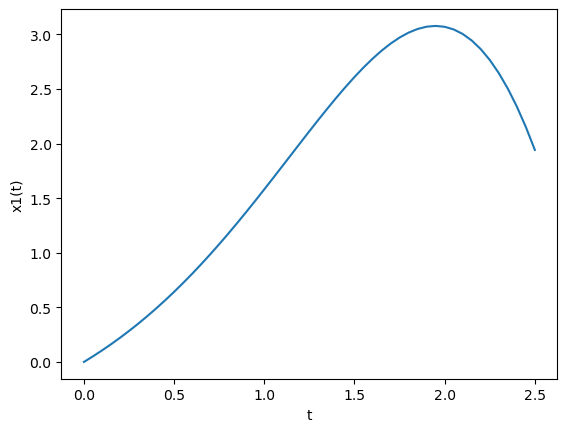

x(2.5) ≈ 1.941450586916583


In [8]:
n = 50
x1_0 = 0; x2_0 = 1
interval = [0,2.5]
t, X = MyRK4System(odefunctions = ODEsystem, tspan = interval, X0 = np.array([x1_0, x2_0]), n = n)

plt.plot(t, X[:,0])
plt.xlabel('t')
plt.ylabel('x1(t)')

plt.show()
print(f"x(2.5) ≈ {X[-1][0]}")

3.
For $x(0) = x'(0) = 0$, it follows from the assumptions that all higher derivatives at $t = 0$ is $0$, as
$$
x''(0) = x'(0) - 0x(0) = 0 \implies \frac{d^n}{dt^n} x''(0) = 0, \, \forall n \in \mathbb{N}.
$$
The initial conditions therefore gives us the (trivial) solution, $x(t) = 0$, to the ODE

4.


As the ODE is linear, the solution from varying the initial condition $x'(0) = z$, $x_z(t)$, scales linearly with choice of $z$ (as mentioned on slide 19 - week 8).

As we know a numerical solution for $z = 1$, we simply need to solve the equation $1.941z = 1 \implies z = \frac{1}{1.941} = 0.5151$

The choice of z is tested

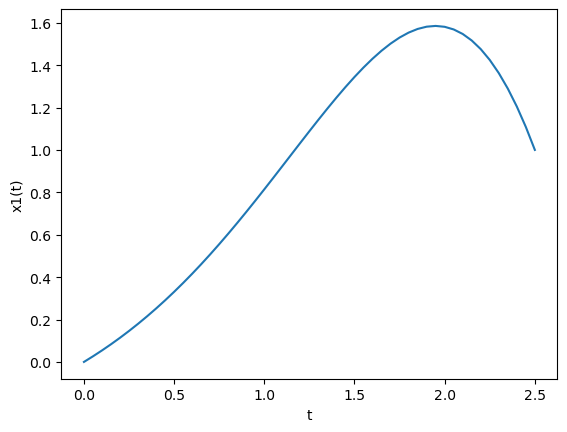

x(2.5) ≈ 1.0000000000000004


In [9]:
n = 50
x1_0 = 0; x2_0 = 1/1.941450586916583
interval = [0,2.5]
t, X = MyRK4System(odefunctions = ODEsystem, tspan = interval, X0 = np.array([x1_0, x2_0]), n = n)

plt.plot(t, X[:,0])
plt.xlabel('t')
plt.ylabel('x1(t)')
plt.show()
print(f"x(2.5) ≈ {X[-1][0]}")

Confirming that the numerical solution with $z = 0.5151$ solves the boundary problem.